In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Data/train_revised .csv')

In [ ]:
df_raw.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


Original train_revised.csv consists of a list of tickets. We need to aggregate them to know how many passengers are for a given ride_id

In [ ]:
ride_id_dict = {} 
for ride_id in df_raw["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [ ]:
df_raw["payment_method"].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [ ]:
df_processed = df_raw.drop(['seat_number', 'payment_receipt', 'travel_to'], axis=1)

In [ ]:
df_processed.drop_duplicates(inplace=True)
df_processed.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49


In [ ]:
df_processed.reset_index(drop= True, inplace=True)
df_processed.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49


In [ ]:
df_processed["number_of_tickets"]= np.zeros(len(df_processed))

Let's update a number of tickets for a given ride.

In [ ]:
for i in range(len(df_processed)):
    ride_id = df_processed.loc[i]["ride_id"]
    df_processed.at[i,"number_of_tickets"] = ride_id_dict[ride_id]

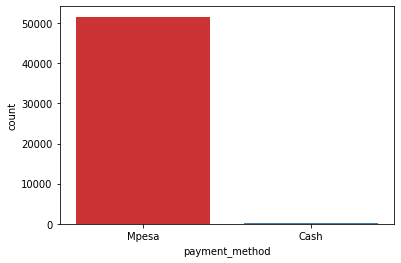

In [ ]:
import seaborn as sns
sns.countplot(x='payment_method', 
              data = df_raw,
              palette = 'Set1')

In [ ]:
df_processed.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1.0
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1.0
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1.0
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5.0
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31.0


In [ ]:
df_processed['travel_time'] = pd.to_datetime(df_processed['travel_time'],format='%H:%M')
df_processed.head() # converted travel time to minutes

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,Mpesa,17-10-17,1900-01-01 07:15:00,Migori,Bus,49,1.0
1,5437,Mpesa,19-11-17,1900-01-01 07:12:00,Migori,Bus,49,1.0
2,5710,Mpesa,26-11-17,1900-01-01 07:05:00,Keroka,Bus,49,1.0
3,5777,Mpesa,27-11-17,1900-01-01 07:10:00,Homa Bay,Bus,49,5.0
4,5778,Mpesa,27-11-17,1900-01-01 07:12:00,Migori,Bus,49,31.0


In [ ]:
df_processed['travel_date'] = pd.to_datetime(df_processed['travel_date'])
df_processed['hour'] = df_processed.travel_time.dt.hour
df_processed['month'] = df_processed.travel_date.dt.month
df_processed['day'] = df_processed.travel_date.dt.dayofyear

In [ ]:
features=df_processed.drop(["number_of_tickets"], axis=1)
targets=df_processed['number_of_tickets']

In [ ]:
targets

0        1.0
1        1.0
2        1.0
3        5.0
4       31.0
        ... 
6286    11.0
6287    11.0
6288     1.0
6289     1.0
6290     1.0
Name: number_of_tickets, Length: 6291, dtype: float64

In [ ]:
features=features.drop(["travel_date", "travel_time"],axis=1)
features.head()

,ride_id,payment_method,travel_from,car_type,max_capacity,hour,month,day
0,1442,Mpesa,Migori,Bus,49,7,10,290
1,5437,Mpesa,Migori,Bus,49,7,11,323
2,5710,Mpesa,Keroka,Bus,49,7,11,330
3,5777,Mpesa,Homa Bay,Bus,49,7,11,331
4,5778,Mpesa,Migori,Bus,49,7,11,331


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ride_id            6291 non-null   int64         
 1   payment_method     6291 non-null   object        
 2   travel_date        6291 non-null   datetime64[ns]
 3   travel_time        6291 non-null   datetime64[ns]
 4   travel_from        6291 non-null   object        
 5   car_type           6291 non-null   object        
 6   max_capacity       6291 non-null   int64         
 7   number_of_tickets  6291 non-null   float64       
 8   hour               6291 non-null   int64         
 9   month              6291 non-null   int64         
 10  day                6291 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 540.8+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
cols1 = ("payment_method","car_type", "travel_from")
df_processed2 = pd.DataFrame(df_processed, columns=['cols1'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_processed['Bridge_Types_Cat'] = labelencoder.fit_transform(df_processed['payment_method'])
df_processed['car2'] = labelencoder.fit_transform(df_processed['car_type'])
df_processed['travel_from'] = labelencoder.fit_transform(df_processed['travel_from'])

In [ ]:
df_processed["car_type"]=df_processed["car2"]
df_processed["payment_method"]=df_processed["Bridge_Types_Cat"]

In [ ]:
df_processed=df_processed.drop(["travel_date", "travel_time"],axis=1)

In [ ]:
features1=df_processed.drop(["number_of_tickets"],axis=1)
features1=features1.drop(["ride_id"],axis=1)

In [ ]:
features1

,payment_method,travel_from,car_type,max_capacity,hour,month,day,Bridge_Types_Cat,car2
0,1,9,0,49,7,10,290,1,0
1,1,9,0,49,7,11,323,1,0
2,1,4,0,49,7,11,330,1,0
3,1,1,0,49,7,11,331,1,0
4,1,9,0,49,7,11,331,1,0
...,...,...,...,...,...,...,...,...,...
6286,1,10,0,49,23,4,110,1,0
6287,1,10,0,49,7,4,110,1,0
6288,1,14,0,49,7,4,110,1,0
6289,1,0,0,49,8,4,110,1,0


In [ ]:
features1=features1.drop(["Bridge_Types_Cat","car2"],axis=1)
features1

,payment_method,travel_from,car_type,max_capacity,hour,month,day
0,1,9,0,49,7,10,290
1,1,9,0,49,7,11,323
2,1,4,0,49,7,11,330
3,1,1,0,49,7,11,331
4,1,9,0,49,7,11,331
...,...,...,...,...,...,...,...
6286,1,10,0,49,23,4,110
6287,1,10,0,49,7,4,110
6288,1,14,0,49,7,4,110
6289,1,0,0,49,8,4,110


In [ ]:
features1=features1.drop(["day"],axis=1)
features1

,payment_method,travel_from,car_type,max_capacity,hour,month
0,1,9,0,49,7,10
1,1,9,0,49,7,11
2,1,4,0,49,7,11
3,1,1,0,49,7,11
4,1,9,0,49,7,11
...,...,...,...,...,...,...
6286,1,10,0,49,23,4
6287,1,10,0,49,7,4
6288,1,14,0,49,7,4
6289,1,0,0,49,8,4


In [ ]:
features1.drop(["car_type"],axis=1)

,payment_method,travel_from,max_capacity,hour,month,day
0,1,9,49,7,10,290
1,1,9,49,7,11,323
2,1,4,49,7,11,330
3,1,1,49,7,11,331
4,1,9,49,7,11,331
...,...,...,...,...,...,...
6286,1,10,49,23,4,110
6287,1,10,49,7,4,110
6288,1,14,49,7,4,110
6289,1,0,49,8,4,110


In [ ]:
features1.drop(["payment_method"],axis=1)

In [ ]:
features1.drop(["max_capacity"],axis=1) # Dropping columns which have same values

,payment_method,travel_from,car_type,number_of_tickets,hour,month
0,1,9,0,1.0,7,10
1,1,9,0,1.0,7,11
2,1,4,0,1.0,7,11
3,1,1,0,5.0,7,11
4,1,9,0,31.0,7,11
...,...,...,...,...,...,...
6286,1,10,0,11.0,23,4
6287,1,10,0,11.0,7,4
6288,1,14,0,1.0,7,4
6289,1,0,0,1.0,8,4


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features1)
X = pd.DataFrame(X, columns = features1.columns)
X.head()

,travel_from,number_of_tickets,month
0,0.411422,-0.843478,1.039415
1,0.411422,-0.843478,1.284936
2,-0.941420,-0.843478,1.284936
3,-1.753125,-0.380277,1.284936
4,0.411422,2.630533,1.284936


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(features1, targets, test_size=0.4)

In [ ]:

val_X.head()

,payment_method,travel_from,car_type,max_capacity,hour,month
2684,1,7,0,49,7,1
3761,1,11,0,49,7,2
3227,1,2,0,49,7,9
3475,1,7,1,11,7,12
2625,1,7,0,49,7,1


In [ ]:
train_X.head()

,payment_method,travel_from,car_type,max_capacity,hour,month
617,1,7,1,11,9,9
4461,1,0,0,49,7,4
1453,1,7,1,11,9,2
4876,1,7,1,11,8,5
97,1,7,1,11,6,11


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
olsmod = LinearRegression()
olsmod.fit(X=train_X, y=train_y)
pd.Series(olsmod.coef_, index=train_X.columns).sort_values()

travel_from      -0.207773
payment_method   -0.106499
car_type         -0.002650
month             0.084145
max_capacity      0.100688
hour              0.699299
dtype: float64

In [ ]:
y_pred=olsmod.predict(val_X)

In [ ]:
print (mean_absolute_error(np.expm1(y_pred), np.expm1(val_y)))

5.235883661982901e+18


In [ ]:
pd.Series(olsmod.coef_, index=train_X.columns)

payment_method   -0.106499
travel_from      -0.207773
car_type         -0.002650
max_capacity      0.100688
hour              0.699299
month             0.084145
dtype: float64

R squared = 0.084


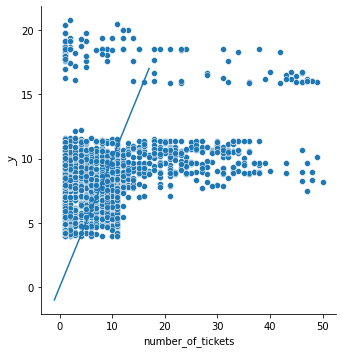

In [ ]:
import seaborn as sns

sns.relplot(x=val_y, y=y_pred)

import matplotlib.pyplot as plt
plt.plot(np.linspace(-1, 17, 100),np.linspace(-1, 17, 100)) # add diagonal line

print('R squared =', round(np.corrcoef(val_y, y=y_pred)[0,1]**2,3))

In [ ]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(val_y, y_pred)
mse = metrics.mean_squared_error(val_y, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(val_y,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 8.057740234107046e-15
MSE: 1.2814718476220479e-28
RMSE: 1.1320211339113982e-14
R-Squared: 1.0


# **Random Forest:**

In [ ]:
X = train_X
y = train_y

In [ ]:
#identifying optimum features
def get_mae(max_leaf_nodes, X, val_X, y, val_y):
    fmod = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42, criterion='mae', n_estimators=1000, n_jobs=-1)
    fmod.fit(X, y)
    preds = fmod.predict(val_X)
    ma_e = mean_absolute_error(np.expm1(val_y), np.expm1(preds))
    return ma_e

In [ ]:
for max_leaf_nodes in [10,100,120,140,200,400]:
    my_mae = get_mae(max_leaf_nodes, X, val_X, y, val_y)
    print(f"Max_leaf_nodes: {max_leaf_nodes}, \t MAE: {my_mae}")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Max_leaf_nodes: 10, 	 MAE: 5.235876070582759e+18


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Max_leaf_nodes: 100, 	 MAE: 5.234162660525228e+18


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Max_leaf_nodes: 120, 	 MAE: 5.236575252092188e+18


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Max_leaf_nodes: 140, 	 MAE: 5.238566536167111e+18


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Max_leaf_nodes: 200, 	 MAE: 5.240136790853837e+18


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Max_leaf_nodes: 400, 	 MAE: 5.239372108471578e+18


In [ ]:
model = RandomForestRegressor(criterion='mae', max_depth=100, max_leaf_nodes=900, 
                              min_samples_leaf= 3, min_samples_split=8,
                              n_estimators=1500, n_jobs=-1, random_state=42)

In [ ]:
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', max_depth=100, max_leaf_nodes=900,
                      min_samples_leaf=3, min_samples_split=8,
                      n_estimators=1500, n_jobs=-1, random_state=42)

In [ ]:
preds_train_set = model.predict(val_X)

In [ ]:
y_pred1=preds_train_set
mae = metrics.mean_absolute_error(val_y, preds_train_set)
mse = metrics.mean_squared_error(val_y, preds_train_set)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(val_y,preds_train_set)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4.096532379817242
MSE: 45.440907276298944
RMSE: 6.74098711438458
R-Squared: 0.3674262856643067


In [ ]:
import seaborn as sns

sns.relplot(x=val_y, y=y_pred)

import matplotlib.pyplot as plt
plt.plot(np.linspace(-1, 17, 100),np.linspace(-1, 17, 100)) # add diagonal line

print('R squared =', round(np.corrcoef(val_y, y=y_pred)[0,1]**2,3))

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(train_X, train_y)
pd.Series(model.coef_[0], index=train_X.columns).sort_values()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


hour             -0.101433
max_capacity      0.020955
travel_from       0.035401
month             0.043648
payment_method    1.297827
car_type          1.846613
dtype: float64

In [ ]:
y_pred2=model.predict(val_X)

In [ ]:
mae = metrics.mean_absolute_error(val_y, y_pred2)
mse = metrics.mean_squared_error(val_y, y_pred2)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(val_y,y_pred2)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 6.445371473976957
MSE: 110.59237187127533
RMSE: 10.516290784838318
R-Squared: -0.5395341256378363


In [ ]:
 
preds_train_set

array([ 4.13833333,  2.23      , 12.00066667, ...,  9.65333333,
        3.52      ,  9.28266667])

In [ ]:
val_X["pred1"]=preds_train_set
val_X

,payment_method,travel_from,car_type,max_capacity,hour,month,pred1
2684,1,7,0,49,7,1,4.138333
3761,1,11,0,49,7,2,2.230000
3227,1,2,0,49,7,9,12.000667
3475,1,7,1,11,7,12,10.285000
2625,1,7,0,49,7,1,4.138333
...,...,...,...,...,...,...,...
5107,1,7,1,11,10,11,7.019000
2152,1,7,1,11,11,4,8.073667
2663,1,7,1,11,7,1,9.653333
6212,1,14,0,49,7,4,3.520000


In [ ]:
val_X=val_X.drop(["pred1"],axis=1)

In [ ]:
from xgboost import XGBRegressor

modelx = XGBRegressor(random_state=42, learning_rate=0.1, max_depth= 5, n_estimators=30)
modelx.fit(train_X, train_y)
preds_valid = modelx.predict(val_X)

[15:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mae = metrics.mean_absolute_error(val_y, preds_valid)
mse = metrics.mean_squared_error(val_y, preds_valid)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(val_y, preds_valid)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4.313348790317667
MSE: 40.917680004161035
RMSE: 6.396692895876824
R-Squared: 0.4303932211377356


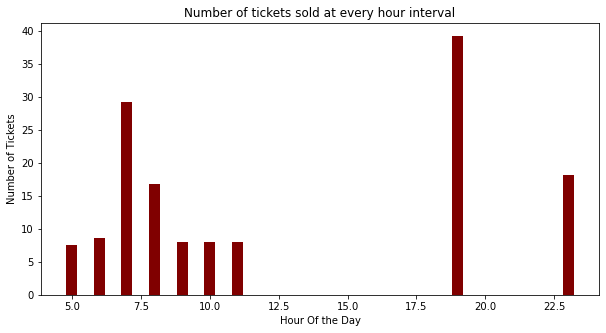

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(val_X['hour'], preds_valid, color ='maroon',
        width = 0.4)
 
plt.xlabel("Hour Of the Day")
plt.ylabel("Number of Tickets")
plt.title("Number of tickets sold at every hour interval")
plt.show()

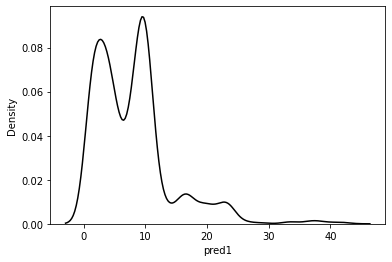

In [ ]:
sns.kdeplot(x = 'pred1' , data = val_X, color = 'black')

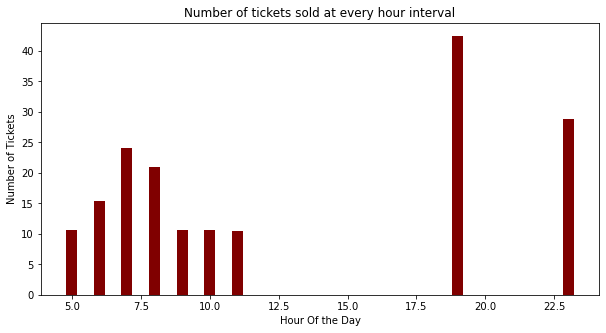

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(val_X['hour'], val_X["pred1"], color ='maroon',
        width = 0.4)
 
plt.xlabel("Hour Of the Day")
plt.ylabel("Number of Tickets")
plt.title("Number of tickets sold at every hour interval")
plt.show()